In [13]:
#패키지 설정                               
from sklearn.preprocessing import StandardScaler         #정규화 모듈 설정
from sklearn.model_selection import train_test_split       #학습용과 테스트용 분리
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential        #딥러닝 모형화
from keras.layers import Dense           #층간 노드 모두 연결
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_excel('/content/drive/MyDrive/대학원/1학기/1. 고급통계분석(김영순)/z. 기말고사 과제/파이썬 분석(최종)/현대차/현대차 주가 관련 자료(엑셀)-1.xlsx')

print(df.head(3))

          일자      시가      고가      저가      종가  전일비  7 거래일 이후 최고 상승률    등락  \
0 2022-12-05  169500  170000  164500  165500    0                0 -3500   
1 2022-12-02  172000  172500  168500  169000    0                0 -2500   
2 2022-12-01  172000  173000  170500  171500    1                0  2500   

   주가등락률     거래량  ...  사모펀드(KOSPI)  기타법인(KOSPI)    기준환율  환율 증감  Open(NASDAQ)  \
0  -2.07  788455  ...         -913           59  1292.6   -7.3   11380.99023   
1  -1.46  453689  ...         -776           31  1299.9    0.2   11308.37988   
2   1.48  499538  ...          -37          191  1299.7  -19.1   11475.16992   

   High(NASDAQ)  Low(NASDAQ)  Close(NASDAQ)  Volume(NASDAQ)  나스닥 등락율  
0   11425.50977  11193.01953    11239.94043      4510030000    -0.02  
1   11492.32031  11296.71973    11461.50000      4523010000     0.00  
2   11546.76953  11378.75000    11482.45020      5158120000     0.00  

[3 rows x 45 columns]


In [16]:
df['7 거래일 이후 최고 상승률'].value_counts()

1    834
2    107
4     14
0      7
3      7
Name: 7 거래일 이후 최고 상승률, dtype: int64

In [17]:
df.set_index('일자',inplace=True)
df = df.astype('float')   #inplace 가 없음

In [18]:
y=df[['7 거래일 이후 최고 상승률']]   #목표변수의 데이터 프레임
y = y.astype(int)
print(y)

            7 거래일 이후 최고 상승률
일자                         
2022-12-05                0
2022-12-02                0
2022-12-01                0
2022-11-30                0
2022-11-29                0
...                     ...
2019-01-09                1
2019-01-08                1
2019-01-07                1
2019-01-04                1
2019-01-03                1

[969 rows x 1 columns]


In [19]:
X = df.drop('7 거래일 이후 최고 상승률', axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)    #학습용과 데이터 분리(7:3)

In [20]:
#정규화 스케일러 생성
scalerX = StandardScaler()
#정규화 스케일러를 학습용 데이터에 맞춤
scalerX.fit(X_train)
#정규화 스케일러로 학습용 데이터를 변환
X_train_std=scalerX.transform(X_train)
#정규화 스케일러로 테스트용 데이터를 변화
X_test_std=scalerX.transform(X_test)

In [21]:
import numpy as np
y_train.reset_index(inplace=True)
y_train2 = np.array(y_train['7 거래일 이후 최고 상승률'])
y_test.reset_index(inplace=True)
y_test2 = np.array(y_test['7 거래일 이후 최고 상승률'])

y_train2 = pd.get_dummies(y_train2)
y_test2 = pd.get_dummies(y_test2)

In [22]:
import tensorflow as tf
#모형 구조
model=Sequential()       #순차모형
model.add(Dense(20,activation='relu', input_shape=(43,)))      #제1은닉층과 입력층
model.add(Dense(15,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                880       
                                                                 
 dense_6 (Dense)             (None, 15)                315       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 80        
                                                                 
Total params: 1,275
Trainable params: 1,275
Non-trainable params: 0
_________________________________________________________________


In [23]:
#모형구성

model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy',tf.keras.metrics.Precision(name='precision')])

In [24]:
#학습
results=model.fit(X_train_std, y_train2,                 #학습데이터
	        validation_data=(X_test_std, y_test2),	   #테스트데이터	
	        epochs=100,batch_size=32)

Epoch 1/100
22/22 [==============================] - 4s 57ms/step - loss: 1.4160 - accuracy: 0.5162 - precision: 0.7476 - val_loss: 1.1735 - val_accuracy: 0.7079 - val_precision: 0.8625
Epoch 2/100
22/22 [==============================] - 0s 16ms/step - loss: 1.1096 - accuracy: 0.7714 - precision: 0.8484 - val_loss: 0.9599 - val_accuracy: 0.8351 - val_precision: 0.8487
Epoch 3/100
22/22 [==============================] - 0s 11ms/step - loss: 0.8909 - accuracy: 0.8378 - precision: 0.8768 - val_loss: 0.8209 - val_accuracy: 0.8522 - val_precision: 0.8389
Epoch 4/100
22/22 [==============================] - 0s 14ms/step - loss: 0.7693 - accuracy: 0.8599 - precision: 0.8805 - val_loss: 0.7234 - val_accuracy: 0.8522 - val_precision: 0.8548
Epoch 5/100
22/22 [==============================] - 0s 13ms/step - loss: 0.7108 - accuracy: 0.8584 - precision: 0.8848 - val_loss: 0.6567 - val_accuracy: 0.8522 - val_precision: 0.8609
Epoch 6/100
22/22 [==============================] - 0s 12ms/step - lo

In [25]:
#학습모형에 저장된 키(변수)
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])


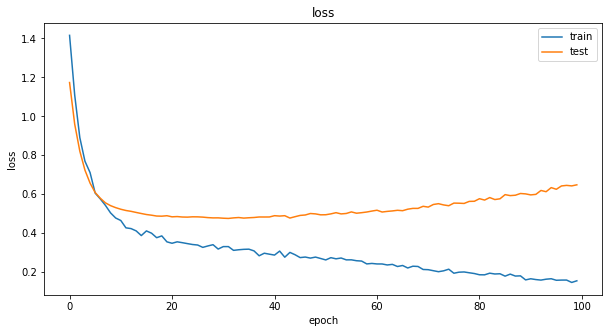

In [26]:
#학습 수에 따른 loss변화
plt.figure(figsize=(10,5))
plt.plot(results.history['loss'])    #학습데이터의 손실
plt.plot(results.history['val_loss'])     #테스트데이터의 손실
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper right')
plt.show()

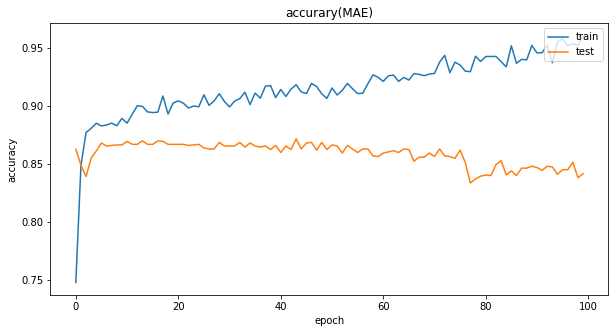

In [27]:
#학습 수에 따른 정확도(mae)변화
plt.figure(figsize=(10,5))
plt.plot(results.history['precision'])      #학습데이터의 오차
plt.plot(results.history['val_precision'])   #테스트 데이터의 오차
plt.title('accurary(MAE)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [30]:
y_pred=np.argmax(model.predict(X_test_std), axis=1)
y_test = y_test['7 거래일 이후 최고 상승률']
import sklearn
sklearn.metrics.confusion_matrix(y_test, y_pred)

10/10 [==============================] - 0s 5ms/step


array([[  0,   3,   0,   0,   0],
       [  0, 238,  10,   0,   0],
       [  0,  26,   5,   0,   0],
       [  0,   3,   0,   0,   0],
       [  0,   1,   4,   0,   1]])

In [31]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)

pre = precision_score(y_test, y_pred, average='weighted')
print('precision_score : ', pre)

recall = recall_score(y_test, y_pred, average='weighted')
print('recall_score: ', recall)

accuracy_score :  0.8384879725085911
precision_score :  0.7971087035883924
recall_score:  0.8384879725085911


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
)